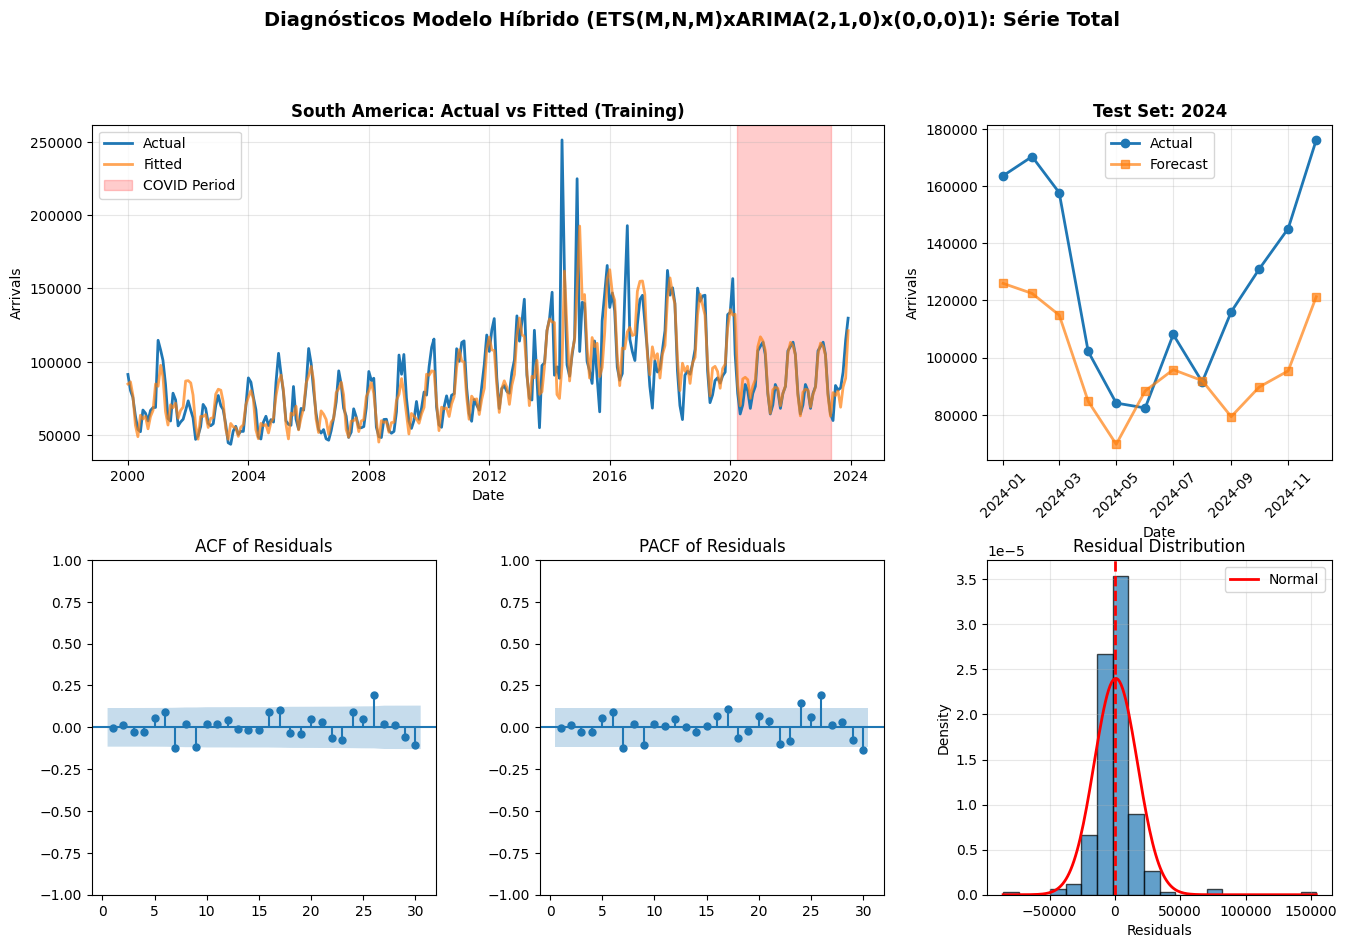

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# 1. Import data
df = pd.read_csv('forecasts_comparison.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 2. Prepare variables for plotting
# Assuming the last 12 months are the test set based on the context variables
SPLIT = 12
train = df.iloc[:-SPLIT]
test = df.iloc[-SPLIT:]

y_train = train['actual']
fitted = train['forecast']
residuals = train['error']  # Diagnostics are typically performed on training residuals

y_test = test['actual']
forecast = test['forecast']

continent = df['continent'].iloc[0]
model_title = f'Diagnósticos Modelo Híbrido (ETS(M,N,M)xARIMA(2,1,0)x(0,0,0)1): Série Total'

# Ensure covid dates are available (using values from context if not defined, but defining here for safety)
covid_start = pd.Timestamp('2020-03-19')
covid_end = pd.Timestamp('2023-05-05')

# 3. Plot diagnostics
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Plot 1: Fitted vs Actual (Training)
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(y_train.index, y_train.values, label='Actual', linewidth=2)
ax1.plot(fitted.index, fitted.values, label='Fitted', linewidth=2, alpha=0.7)
ax1.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='COVID Period')
ax1.set_title(f'{continent}: Actual vs Fitted (Training)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Arrivals')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Forecast vs Actual (Test)
ax2 = fig.add_subplot(gs[0, 2])
ax2.plot(y_test.index, y_test.values, label='Actual', linewidth=2, marker='o')
ax2.plot(forecast.index, forecast.values, label='Forecast', linewidth=2, alpha=0.7, marker='s')
ax2.set_title('Test Set: 2024', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Arrivals')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Plot 3: ACF of Residuals
ax4 = fig.add_subplot(gs[1, 0])
sm.graphics.tsa.plot_acf(residuals.dropna(), lags=30, ax=ax4, zero=False)
ax4.set_title('ACF of Residuals')

# Plot 4: PACF of Residuals
ax5 = fig.add_subplot(gs[1, 1])
sm.graphics.tsa.plot_pacf(residuals.dropna(), lags=30, ax=ax5, zero=False, method='ywm')
ax5.set_title('PACF of Residuals')

# Plot 5: Histogram of Residuals
ax6 = fig.add_subplot(gs[1, 2])
resid_vals = residuals.dropna().values
ax6.hist(resid_vals, bins=20, alpha=0.7, edgecolor='black', density=True)
ax6.axvline(x=0, color='r', linestyle='--', linewidth=2)
# Normal distribution overlay
mu, sigma = np.mean(resid_vals), np.std(resid_vals)
x_pdf = np.linspace(resid_vals.min(), resid_vals.max(), 200)
ax6.plot(x_pdf, stats.norm.pdf(x_pdf, mu, sigma), 'r-', linewidth=2, label='Normal')
ax6.set_title('Residual Distribution')
ax6.set_xlabel('Residuals')
ax6.set_ylabel('Density')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.suptitle(model_title, fontsize=14, fontweight='bold', y=0.995)
plt.show()


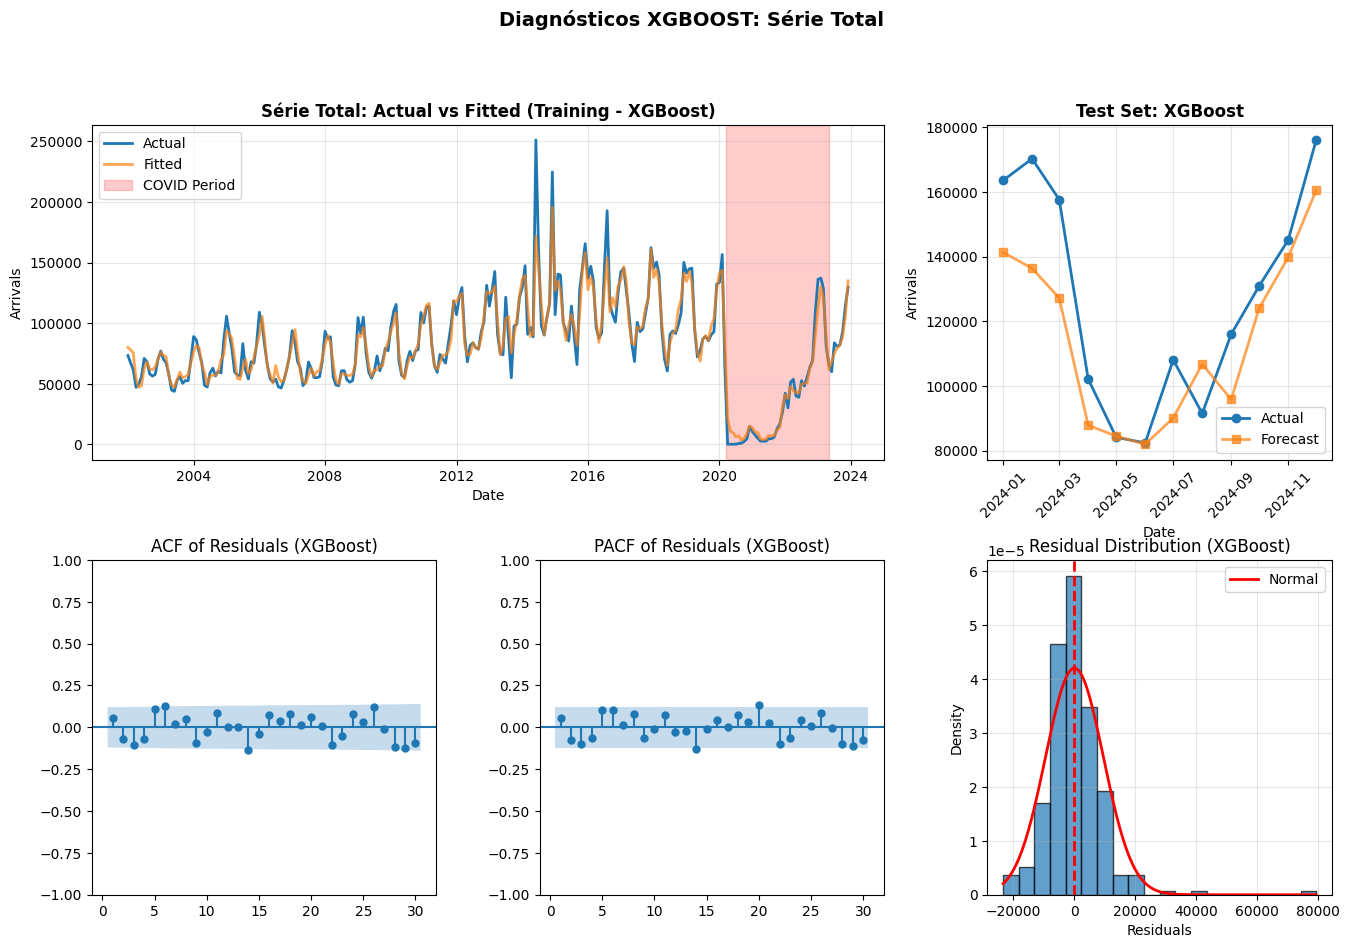

In [29]:
# 1. Import XGBoost data
train_xgb = pd.read_csv('xgboost_forecasts_TRAIN.csv')
test_xgb = pd.read_csv('xgboost_forecasts.csv')

# Filter for 'TOTAL' continent
train_xgb = train_xgb[train_xgb['continent'] == 'TOTAL (Agregado)'].copy()
test_xgb = test_xgb[test_xgb['continent'] == 'TOTAL (Agregado)'].copy()

train_xgb['date'] = pd.to_datetime(train_xgb['date'])
train_xgb.set_index('date', inplace=True)

test_xgb['date'] = pd.to_datetime(test_xgb['date'])
test_xgb.set_index('date', inplace=True)

# 2. Prepare variables for plotting
y_train_xgb = train_xgb['actual']
fitted_xgb = train_xgb['forecast']
# Calculate residuals if 'error' column doesn't exist, otherwise use it
if 'error' in train_xgb.columns:
    residuals_xgb = train_xgb['error']
else:
    residuals_xgb = train_xgb['actual'] - train_xgb['forecast']

y_test_xgb = test_xgb['actual']
forecast_xgb = test_xgb['forecast']

continent_xgb = 'Série Total'
model_title_xgb = f'Diagnósticos XGBOOST: {continent_xgb}'

# Ensure covid dates are available
covid_start = pd.Timestamp('2020-03-19')
covid_end = pd.Timestamp('2023-05-05')

# 3. Plot diagnostics
fig_xgb = plt.figure(figsize=(16, 10))
gs_xgb = fig_xgb.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Plot 1: Fitted vs Actual (Training)
ax1_xgb = fig_xgb.add_subplot(gs_xgb[0, :2])
ax1_xgb.plot(y_train_xgb.index, y_train_xgb.values, label='Actual', linewidth=2)
ax1_xgb.plot(fitted_xgb.index, fitted_xgb.values, label='Fitted', linewidth=2, alpha=0.7)
ax1_xgb.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='COVID Period')
ax1_xgb.set_title(f'{continent_xgb}: Actual vs Fitted (Training - XGBoost)', fontsize=12, fontweight='bold')
ax1_xgb.set_xlabel('Date')
ax1_xgb.set_ylabel('Arrivals')
ax1_xgb.legend()
ax1_xgb.grid(True, alpha=0.3)

# Plot 2: Forecast vs Actual (Test)
ax2_xgb = fig_xgb.add_subplot(gs_xgb[0, 2])
ax2_xgb.plot(y_test_xgb.index, y_test_xgb.values, label='Actual', linewidth=2, marker='o')
ax2_xgb.plot(forecast_xgb.index, forecast_xgb.values, label='Forecast', linewidth=2, alpha=0.7, marker='s')
ax2_xgb.set_title('Test Set: XGBoost', fontsize=12, fontweight='bold')
ax2_xgb.set_xlabel('Date')
ax2_xgb.set_ylabel('Arrivals')
ax2_xgb.legend()
ax2_xgb.grid(True, alpha=0.3)
ax2_xgb.tick_params(axis='x', rotation=45)

# Plot 3: ACF of Residuals
ax4_xgb = fig_xgb.add_subplot(gs_xgb[1, 0])
sm.graphics.tsa.plot_acf(residuals_xgb.dropna(), lags=30, ax=ax4_xgb, zero=False)
ax4_xgb.set_title('ACF of Residuals (XGBoost)')

# Plot 4: PACF of Residuals
ax5_xgb = fig_xgb.add_subplot(gs_xgb[1, 1])
sm.graphics.tsa.plot_pacf(residuals_xgb.dropna(), lags=30, ax=ax5_xgb, zero=False, method='ywm')
ax5_xgb.set_title('PACF of Residuals (XGBoost)')

# Plot 5: Histogram of Residuals
ax6_xgb = fig_xgb.add_subplot(gs_xgb[1, 2])
resid_vals_xgb = residuals_xgb.dropna().values
ax6_xgb.hist(resid_vals_xgb, bins=20, alpha=0.7, edgecolor='black', density=True)
ax6_xgb.axvline(x=0, color='r', linestyle='--', linewidth=2)
# Normal distribution overlay
mu_xgb, sigma_xgb = np.mean(resid_vals_xgb), np.std(resid_vals_xgb)
x_pdf_xgb = np.linspace(resid_vals_xgb.min(), resid_vals_xgb.max(), 200)
ax6_xgb.plot(x_pdf_xgb, stats.norm.pdf(x_pdf_xgb, mu_xgb, sigma_xgb), 'r-', linewidth=2, label='Normal')
ax6_xgb.set_title('Residual Distribution (XGBoost)')
ax6_xgb.set_xlabel('Residuals')
ax6_xgb.set_ylabel('Density')
ax6_xgb.legend()
ax6_xgb.grid(True, alpha=0.3)

plt.suptitle(model_title_xgb, fontsize=14, fontweight='bold', y=0.995)
plt.show()

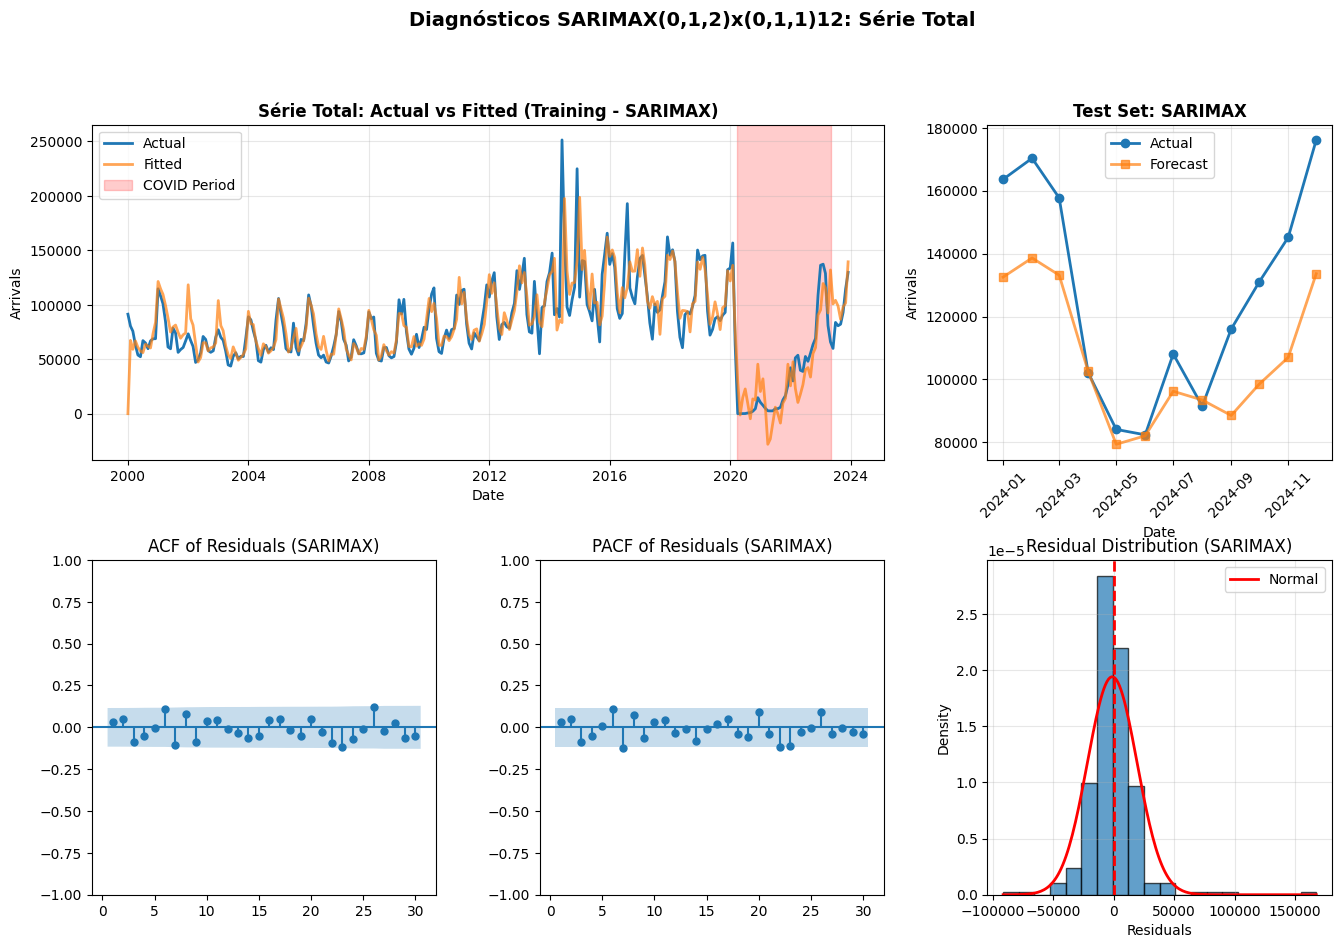

In [34]:
# 1. Import SARIMAX data
train_sarimax = pd.read_csv('11_sarimax_forecasts_TRAIN.csv')
test_sarimax = pd.read_csv('11_sarimax_forecasts.csv')

# Filter for 'TOTAL' continent
train_sarimax = train_sarimax[train_sarimax['continent'] == 'TOTAL'].copy()
test_sarimax = test_sarimax[test_sarimax['continent'] == 'TOTAL'].copy()

train_sarimax['date'] = pd.to_datetime(train_sarimax['date'])
train_sarimax.set_index('date', inplace=True)

test_sarimax['date'] = pd.to_datetime(test_sarimax['date'])
test_sarimax.set_index('date', inplace=True)

# 2. Prepare variables for plotting
y_train_sarimax = train_sarimax['actual']
fitted_sarimax = train_sarimax['forecast']

# Calculate residuals if 'error' column doesn't exist, otherwise use it
if 'error' in train_sarimax.columns:
    residuals_sarimax = train_sarimax['error']
else:
    residuals_sarimax = train_sarimax['actual'] - train_sarimax['forecast']

y_test_sarimax = test_sarimax['actual']
forecast_sarimax = test_sarimax['forecast']

continent_sarimax = 'Série Total'
model_title_sarimax = f'Diagnósticos SARIMAX(0,1,2)x(0,1,1)12: {continent_sarimax}'

# Ensure covid dates are available
covid_start = pd.Timestamp('2020-03-19')
covid_end = pd.Timestamp('2023-05-05')

# 3. Plot diagnostics
fig_sarimax = plt.figure(figsize=(16, 10))
gs_sarimax = fig_sarimax.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Plot 1: Fitted vs Actual (Training)
ax1_sarimax = fig_sarimax.add_subplot(gs_sarimax[0, :2])
ax1_sarimax.plot(y_train_sarimax.index, y_train_sarimax.values, label='Actual', linewidth=2)
ax1_sarimax.plot(fitted_sarimax.index, fitted_sarimax.values, label='Fitted', linewidth=2, alpha=0.7)
ax1_sarimax.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='COVID Period')
ax1_sarimax.set_title(f'{continent_sarimax}: Actual vs Fitted (Training - SARIMAX)', fontsize=12, fontweight='bold')
ax1_sarimax.set_xlabel('Date')
ax1_sarimax.set_ylabel('Arrivals')
ax1_sarimax.legend()
ax1_sarimax.grid(True, alpha=0.3)

# Plot 2: Forecast vs Actual (Test)
ax2_sarimax = fig_sarimax.add_subplot(gs_sarimax[0, 2])
ax2_sarimax.plot(y_test_sarimax.index, y_test_sarimax.values, label='Actual', linewidth=2, marker='o')
ax2_sarimax.plot(forecast_sarimax.index, forecast_sarimax.values, label='Forecast', linewidth=2, alpha=0.7, marker='s')
ax2_sarimax.set_title('Test Set: SARIMAX', fontsize=12, fontweight='bold')
ax2_sarimax.set_xlabel('Date')
ax2_sarimax.set_ylabel('Arrivals')
ax2_sarimax.legend()
ax2_sarimax.grid(True, alpha=0.3)
ax2_sarimax.tick_params(axis='x', rotation=45)

# Plot 3: ACF of Residuals
ax4_sarimax = fig_sarimax.add_subplot(gs_sarimax[1, 0])
sm.graphics.tsa.plot_acf(residuals_sarimax.dropna(), lags=30, ax=ax4_sarimax, zero=False)
ax4_sarimax.set_title('ACF of Residuals (SARIMAX)')

# Plot 4: PACF of Residuals
ax5_sarimax = fig_sarimax.add_subplot(gs_sarimax[1, 1])
sm.graphics.tsa.plot_pacf(residuals_sarimax.dropna(), lags=30, ax=ax5_sarimax, zero=False, method='ywm')
ax5_sarimax.set_title('PACF of Residuals (SARIMAX)')

# Plot 5: Histogram of Residuals
ax6_sarimax = fig_sarimax.add_subplot(gs_sarimax[1, 2])
resid_vals_sarimax = residuals_sarimax.dropna().values
ax6_sarimax.hist(resid_vals_sarimax, bins=20, alpha=0.7, edgecolor='black', density=True)
ax6_sarimax.axvline(x=0, color='r', linestyle='--', linewidth=2)
# Normal distribution overlay
mu_sarimax, sigma_sarimax = np.mean(resid_vals_sarimax), np.std(resid_vals_sarimax)
x_pdf_sarimax = np.linspace(resid_vals_sarimax.min(), resid_vals_sarimax.max(), 200)
ax6_sarimax.plot(x_pdf_sarimax, stats.norm.pdf(x_pdf_sarimax, mu_sarimax, sigma_sarimax), 'r-', linewidth=2, label='Normal')
ax6_sarimax.set_title('Residual Distribution (SARIMAX)')
ax6_sarimax.set_xlabel('Residuals')
ax6_sarimax.set_ylabel('Density')
ax6_sarimax.legend()
ax6_sarimax.grid(True, alpha=0.3)

plt.suptitle(model_title_sarimax, fontsize=14, fontweight='bold', y=0.995)
plt.show()